In [1]:
# *** clean up libraries
import numpy as np
import numpy.ma as ma
# import math
import time
# import os
import pandas as pd
# import scipy
# from scipy import stats
# from scipy import signal
# from scipy import misc
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.mlab as mlab
import matplotlib.path as mplPath
from matplotlib import dates, rc, font_manager
import matplotlib.dates as mdates

### Import the CSV file using pandas

Start with Water Year 2022
*** import CSV using pandas

In [2]:
met_data_22 = pd.read_csv('BORR_WY_2022.csv')

Print the table of the met data to see what variables you have. What is the temporal frequency of the data?

In [3]:
met_data_22


,Time,Blue Oak Ranch Air Temp Avg degC,Blue Oak Ranch Rainfall mm,Blue Oak Ranch Relative Humidity Avg %,Blue Oak Ranch Soil Temp 100 mm Avg degC,Blue Oak Ranch Soil Temp 200 mm Avg degC,Blue Oak Ranch Soil Temp 50 mm Avg degC,Blue Oak Ranch Soil Temp 500 mm Avg degC,Blue Oak Ranch Total Solar Radiation Avg W/m^2,Blue Oak Ranch Volumetric Water Content Vertical Avg m^3/m^3
0,2021-10-01 00:00:00,13.07,0.0,36.86,22.50,22.95,21.00,22.36,0.0,0.038
1,2021-10-01 00:10:00,13.12,0.0,35.98,22.39,22.94,20.87,22.36,0.0,0.038
2,2021-10-01 00:20:00,13.41,0.0,34.76,22.28,22.94,20.74,22.37,0.0,0.038
3,2021-10-01 00:30:00,13.41,0.0,34.51,22.17,22.94,20.62,22.37,0.0,0.038
4,2021-10-01 00:40:00,13.09,0.0,35.09,22.07,22.93,20.50,22.36,0.0,0.038
...,...,...,...,...,...,...,...,...,...,...
52555,2022-09-30 23:10:00,13.37,0.0,55.94,22.84,23.11,21.51,22.40,0.0,0.064
52556,2022-09-30 23:20:00,13.33,0.0,56.06,22.74,23.11,21.41,22.40,0.0,0.064
52557,2022-09-30 23:30:00,13.20,0.0,56.17,22.65,23.10,21.31,22.40,0.0,0.064
52558,2022-09-30 23:40:00,13.03,0.0,56.81,22.56,23.09,21.22,22.40,0.0,0.064


#### Start by plotting air temperature, relative humidity, incoming solar radiation, and volumetric soil moisture, each in a separate plot. Do not worry about the x axis for now. *** label the y axis

Air temperature

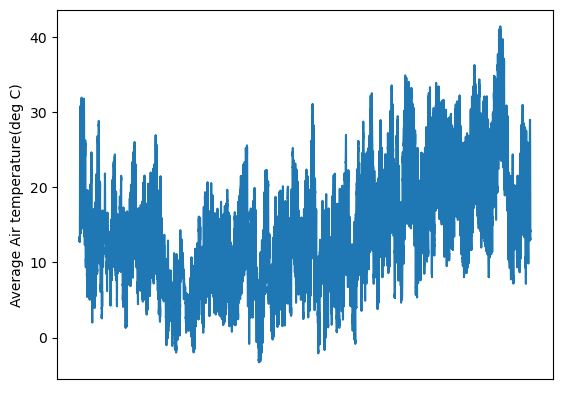

In [4]:
index_choice = 'Blue Oak Ranch Air Temp Avg degC'
plt.plot(met_data_22[index_choice])
plt.ylabel('Average Air temperature(deg C)')
plt.xticks([]); #*** keep this for the students? 

Relative humidity

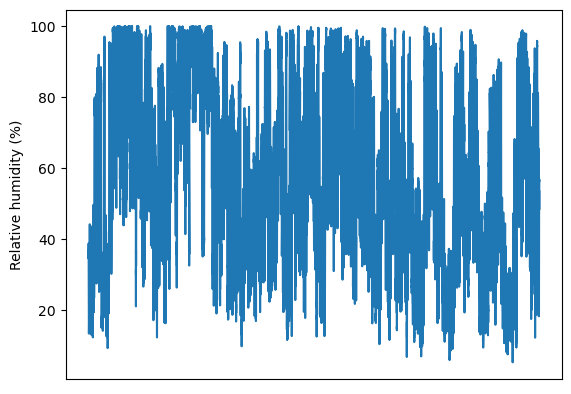

In [5]:
index_choice = 'Blue Oak Ranch Relative Humidity Avg %'
plt.plot(met_data_22[index_choice])
plt.ylabel('Relative humidity (%)')
plt.xticks([]);

Solar radiation


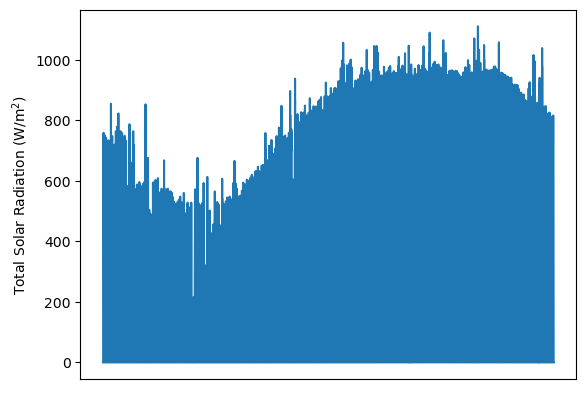

In [6]:
index_choice = 'Blue Oak Ranch Total Solar Radiation Avg W/m^2'
plt.plot(met_data_22[index_choice])
plt.ylabel(r'Total Solar Radiation (W/m$^2$)')
plt.xticks([]);

Soil moisture

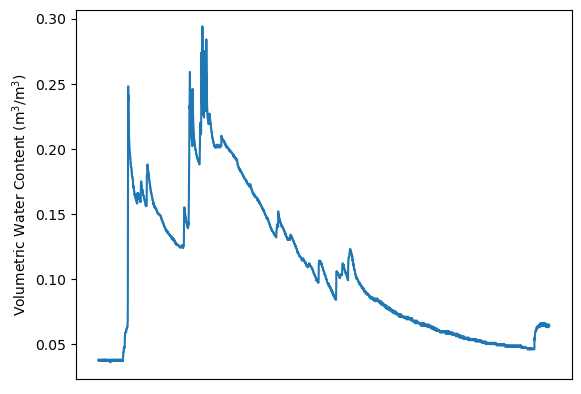

In [7]:
index_choice = 'Blue Oak Ranch Volumetric Water Content Vertical Avg m^3/m^3'
plt.plot(met_data_22[index_choice])
plt.ylabel(r'Volumetric Water Content (m$^3$/m$^3$)')
plt.xticks([]);

### Now let's add the dates on the x axis. For this we need to convert the dates from the table into python "datetime" objects

Here is how to create that new python-usable column of dates

In [3]:
met_data_22.Time = pd.to_datetime(met_data_22['Time'], format='%Y-%m-%d %H:%M:%S.%f')
met_data_22.set_index(['Time'],inplace=True)
# *** keep this for the students

NameError: name 'pd' is not defined

In [2]:
index_choice = 'Blue Oak Ranch Volumetric Water Content Vertical Avg m^3/m^3'

plt.plot(met_data_22.index,met_data_22[index_choice])
ax = plt.gca()
# *** give students hint on not plotting all xticks, maybe using matplotlib mdates to reduce xtick label display. 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.ylabel(r'Volumetric Water Content (m$^3$/m$^3$)')
plt.gcf().autofmt_xdate() # Rotation
plt.show()



NameError: name 'plt' is not defined

### Now let's plot all four soil temperature data on the same plot

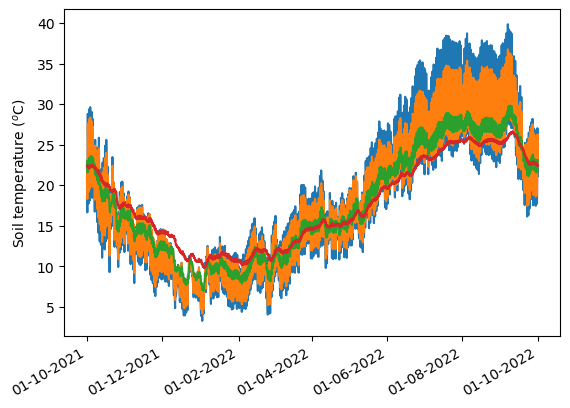

In [12]:
plt.plot(met_data_22.index,met_data_22['Blue Oak Ranch Soil Temp 50 mm Avg degC'])
plt.plot(met_data_22.index,met_data_22['Blue Oak Ranch Soil Temp 100 mm Avg degC'])
plt.plot(met_data_22.index,met_data_22['Blue Oak Ranch Soil Temp 200 mm Avg degC'])
plt.plot(met_data_22.index,met_data_22['Blue Oak Ranch Soil Temp 500 mm Avg degC'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.ylabel(r'Soil temperature ($^o$C)')
plt.gcf().autofmt_xdate() # Rotation
plt.show()

#*** add legend? 
# ask students to propose an interpretation for some of the difference observed between depths; we will revisit in Lab 2. 

### Plot the rainfall as a bar plot

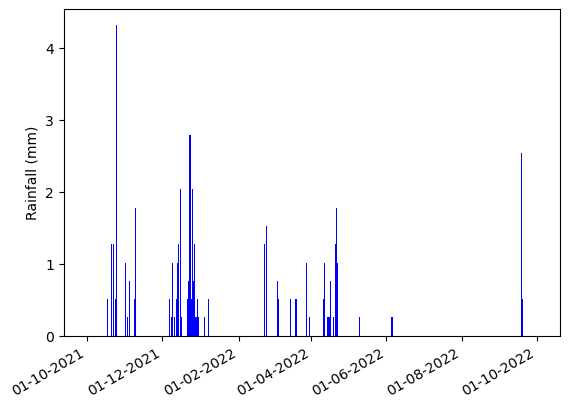

In [13]:
plt.bar(met_data_22.index,met_data_22['Blue Oak Ranch Rainfall mm'],color="blue")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.ylabel(r'Rainfall (mm)')
plt.gcf().autofmt_xdate() # Rotation
plt.show()


Import the two other water years datasets

In [14]:
met_data_21 = pd.read_csv('BORR_WY_2021.csv')
met_data_20 = pd.read_csv('BORR_WY_2020.csv')

Turn times into python times

In [19]:
met_data_21.Time = pd.to_datetime(met_data_21['Time'], format='%Y-%m-%d %H:%M:%S.%f')
met_data_21.set_index(['Time'],inplace=True)

met_data_20.Time = pd.to_datetime(met_data_20['Time'], format='%Y-%m-%d %H:%M:%S.%f')
met_data_20.set_index(['Time'],inplace=True)

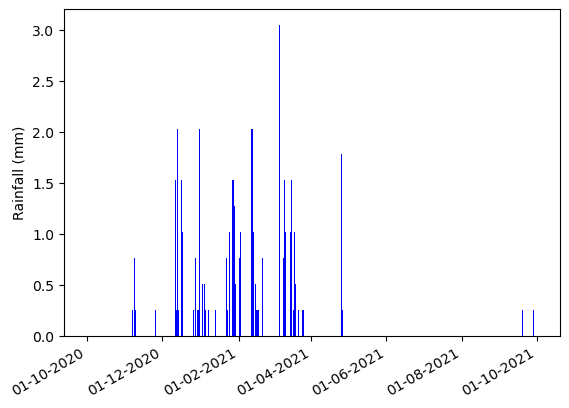

In [26]:
plt.bar(met_data_21.index,met_data_21['Blue Oak Ranch Rainfall mm'],color="blue")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.ylabel(r'Rainfall (mm)')
plt.gcf().autofmt_xdate() # Rotation
plt.show()


Plot the rainfall for 2022 and 2021 on top of each other using subplots

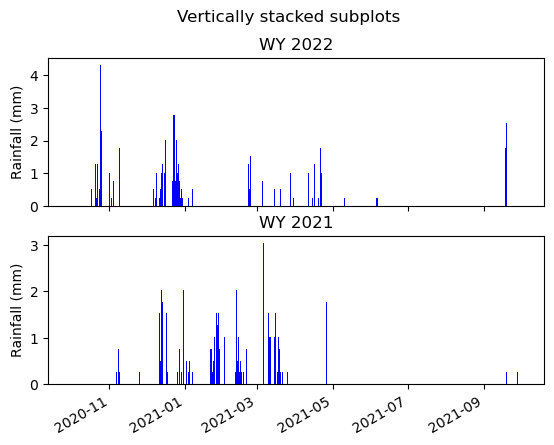

In [31]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].bar(met_data_22.index,met_data_22['Blue Oak Ranch Rainfall mm'],color="blue")
x = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
axs[0].set_ylabel(r'Rainfall (mm)')
axs[0].set_title('WY 2022')
plt.gcf().autofmt_xdate() # Rotation

axs[1].bar(met_data_21.index,met_data_21['Blue Oak Ranch Rainfall mm'],color="blue")
# axs[2].bar(met_data_20.index,met_data_20['Blue Oak Ranch Rainfall mm'],color="blue")
x = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axs[1].set_ylabel(r'Rainfall (mm)')
axs[1].set_title('WY 2021')
plt.gcf().autofmt_xdate() # Rotation
plt.show()

# END OF FIRST LAB ######

## Soil temperature

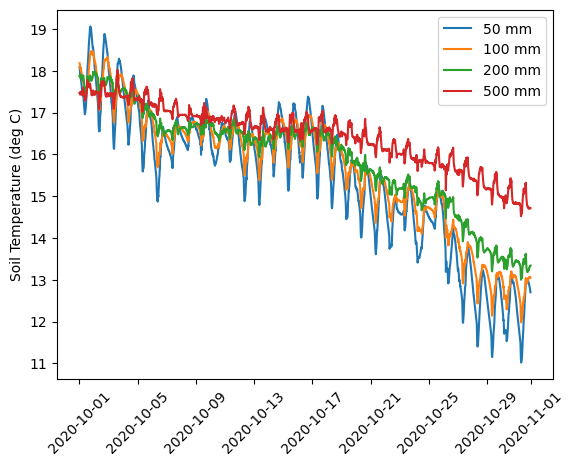

In [12]:
soil_T = met_data.loc[:, ['Time', 'Point Reyes Soil Temp 100 mm Avg degC', 'Point Reyes Soil Temp 200 mm Avg degC', 'Point Reyes Soil Temp 50 mm Avg degC', 'Point Reyes Soil Temp 500 mm Avg degC']]
soil_T['Time'] = pd.to_datetime(soil_T['Time'])
#Subset data for October 2020
soil_T = soil_T.loc[soil_T['Time'] > '10/1/2020  12:00:00 AM']
soil_T = soil_T.loc[soil_T['Time'] < '11/1/2020  12:00:00 AM']

plt.plot(soil_T['Time'], soil_T['Point Reyes Soil Temp 50 mm Avg degC'], label = '50 mm' );
plt.plot(soil_T['Time'], soil_T['Point Reyes Soil Temp 100 mm Avg degC'], label = '100 mm' );
plt.plot(soil_T['Time'], soil_T['Point Reyes Soil Temp 200 mm Avg degC'], label='200 mm');
plt.plot(soil_T['Time'], soil_T['Point Reyes Soil Temp 500 mm Avg degC'], label = '500 mm');
plt.legend();
plt.ylabel('Soil Temperature (deg C)');
plt.xticks(rotation = 45);

## Soil moisture

Text(0, 0.5, 'Volumetric water content (m^3/m^3)')

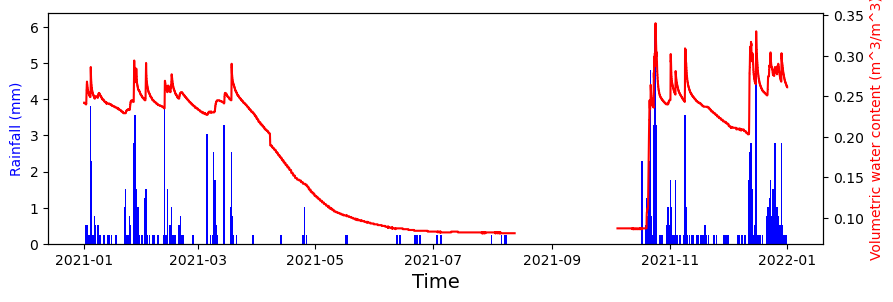

In [13]:
soil_moisture = met_data.loc[:, ['Time', 'Point Reyes Volumetric Water Content Vertical Avg m^3/m^3', 'Point Reyes Rainfall mm']]
soil_moisture['Time'] = pd.to_datetime(soil_moisture['Time'])

soil_moisture = soil_moisture.loc[soil_moisture['Time'] > '1/1/2021  12:00:00 AM']
soil_moisture = soil_moisture.loc[soil_moisture['Time'] < '1/1/2022  12:00:00 AM']

#Plotting soil moisture 
fig,ax = plt.subplots(figsize=(10, 3))
ax.set_ylabel("Rainfall (mm)",color="blue")
ax.bar(soil_moisture['Time'], soil_moisture['Point Reyes Rainfall mm'],color="blue")
ax.set_xlabel("Time", fontsize = 14)


#Plotting rainfall 
ax2=ax.twinx()
ax2.plot(soil_moisture['Time'], soil_moisture['Point Reyes Volumetric Water Content Vertical Avg m^3/m^3'], color = 'red')
ax2.set_ylabel("Volumetric water content (m^3/m^3)", color="red")


## Rainfall

Make monthly cumulative sums of the rainfall

In [14]:
index_choice = 'Point Reyes Rainfall mm'
ave_rain = np.empty((4,12))
ave_rain[::] = np.NaN
for j in range(0,4):
    for i in range(0,12):
        #If a month has less than 1000 data points, we just ignore it and set it to NaN since it would skew the average
        if np.count_nonzero(np.isnan(met_data[((met_data['Month'] == i+1)&(met_data['Year'] == 2019+j))][index_choice].values[:]))>1000:         
            ave_rain[j,i] = np.nan
        elif len(met_data[((met_data['Month'] == i+1)&(met_data['Year'] == 2019+j))][index_choice].values[:])==0:
            ave_rain[j,i] = np.nan
        else:
            ave_rain[j,i] = np.nansum(met_data[((met_data['Month'] == i+1)&(met_data['Year'] == 2019+j))][index_choice].values[:])



Now we average across the years (axis 0) to get an evarge for January, and average for february, etc

In [15]:
month_ave_rain = np.nanmean(ave_rain, axis = 0)

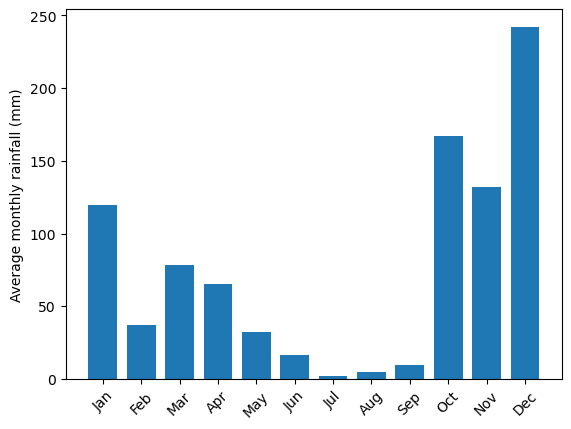

In [16]:
x = np.linspace(0,11,12)
plt.bar(x, month_ave_rain, 0.75)
plt.ylabel('Average monthly rainfall (mm)');
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45) ;